In [1]:
import json

In [2]:
with open(r"D:\IIT-BHU Engg\CSE-SEM4\EXPLO\Final_Project_Code\F100_QIER\5000iter_F_100_Reward_rewards_qier.json", "r") as f:
    reward_qier = json.load(f)
with open(r"D:\IIT-BHU Engg\CSE-SEM4\EXPLO\Final_Project_Code\F100_PER\500iter_F_75_Reward_rewards_per.json", "r") as f:
    reward_per = json.load(f)
with open(r"D:\IIT-BHU Engg\CSE-SEM4\EXPLO\Final_Project_Code\F100_LRU\2000iter_100F_Reward_rewards_lru.json", "r") as f:
    reward_lru = json.load(f)



In [3]:
with open(r"..\..\json\Changing_no_of_contents\QIER\QIER_100F\lr_0.001_5000iter_F_100_Reward_rewards_qier.json", "r") as f:
    lr_0_001_final_reward_qier = json.load(f)[:3000]
with open(r"..\..\json\Changing_learning_rate\FIFO_lr0.5\lr_0.5_5000iter_F_100_Reward_rewards_FIFO.json", "r") as f:
    lr_0_5_final_reward_fifo= json.load(f)[:3000]
with open(r"..\..\json\Changing_learning_rate\QIER_lr0.0001\lr_0.0001_5000iter_F_100_Reward_rewards_qier (1).json", "r") as f:
    lr_0_0001_final_reward_qier = json.load(f)[:3000]
with open(r"..\..\json\Changing_learning_rate\QIER_lr0.5\lr_0.5_5000iter_F_100_Reward_rewards_qier.json", "r") as f:
    lr_0_5_final_reward_qier= json.load(f)[:3000]
with open(r"..\..\json\Changing_learning_rate\FIFO_lr0.0001\lr_0.0001_5000iter_F_100_Reward_rewards_FIFO.json", "r") as f:
     lr_0_0001_final_reward_fifo = json.load(f)[:3000]
with open(r"..\..\json\Changing_no_of_contents\FIFO\FIFO_100F\lr_0.05_5000iter_F_100_Reward_rewards_FIFO.json") as f:
     lr_0_05_final_reward_fifo = json.load(f)[:3000]



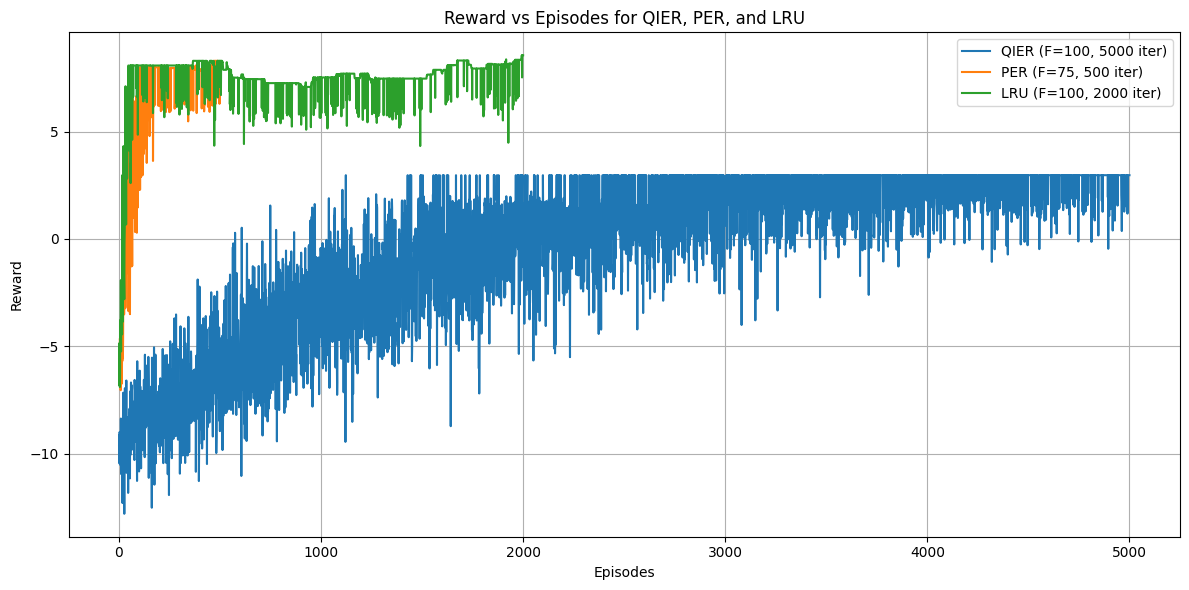

In [4]:
import json
import matplotlib.pyplot as plt

# Load reward data from the provided files
file_paths = {
    "QIER (F=100, 5000 iter)": r"D:\IIT-BHU Engg\CSE-SEM4\EXPLO\Final_Project_Code\F100_QIER\5000iter_F_100_Reward_rewards_qier.json",
    "PER (F=75, 500 iter)": r"D:\IIT-BHU Engg\CSE-SEM4\EXPLO\Final_Project_Code\F100_PER\500iter_F_75_Reward_rewards_per.json",
    "LRU (F=100, 2000 iter)": r"D:\IIT-BHU Engg\CSE-SEM4\EXPLO\Final_Project_Code\F100_LRU\2000iter_100F_Reward_rewards_lru.json"
}

reward_data = {}
for label, path in file_paths.items():
    with open(path, "r") as f:
        reward_data[label] = json.load(f)

# Plotting the rewards
plt.figure(figsize=(12, 6))
for label, rewards in reward_data.items():
    plt.plot(range(1, len(rewards) + 1), rewards, label=label)

plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Reward vs Episodes for QIER, PER, and LRU")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\athya\AppData\Local\Temp\ipykernel_21864\2416584688.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


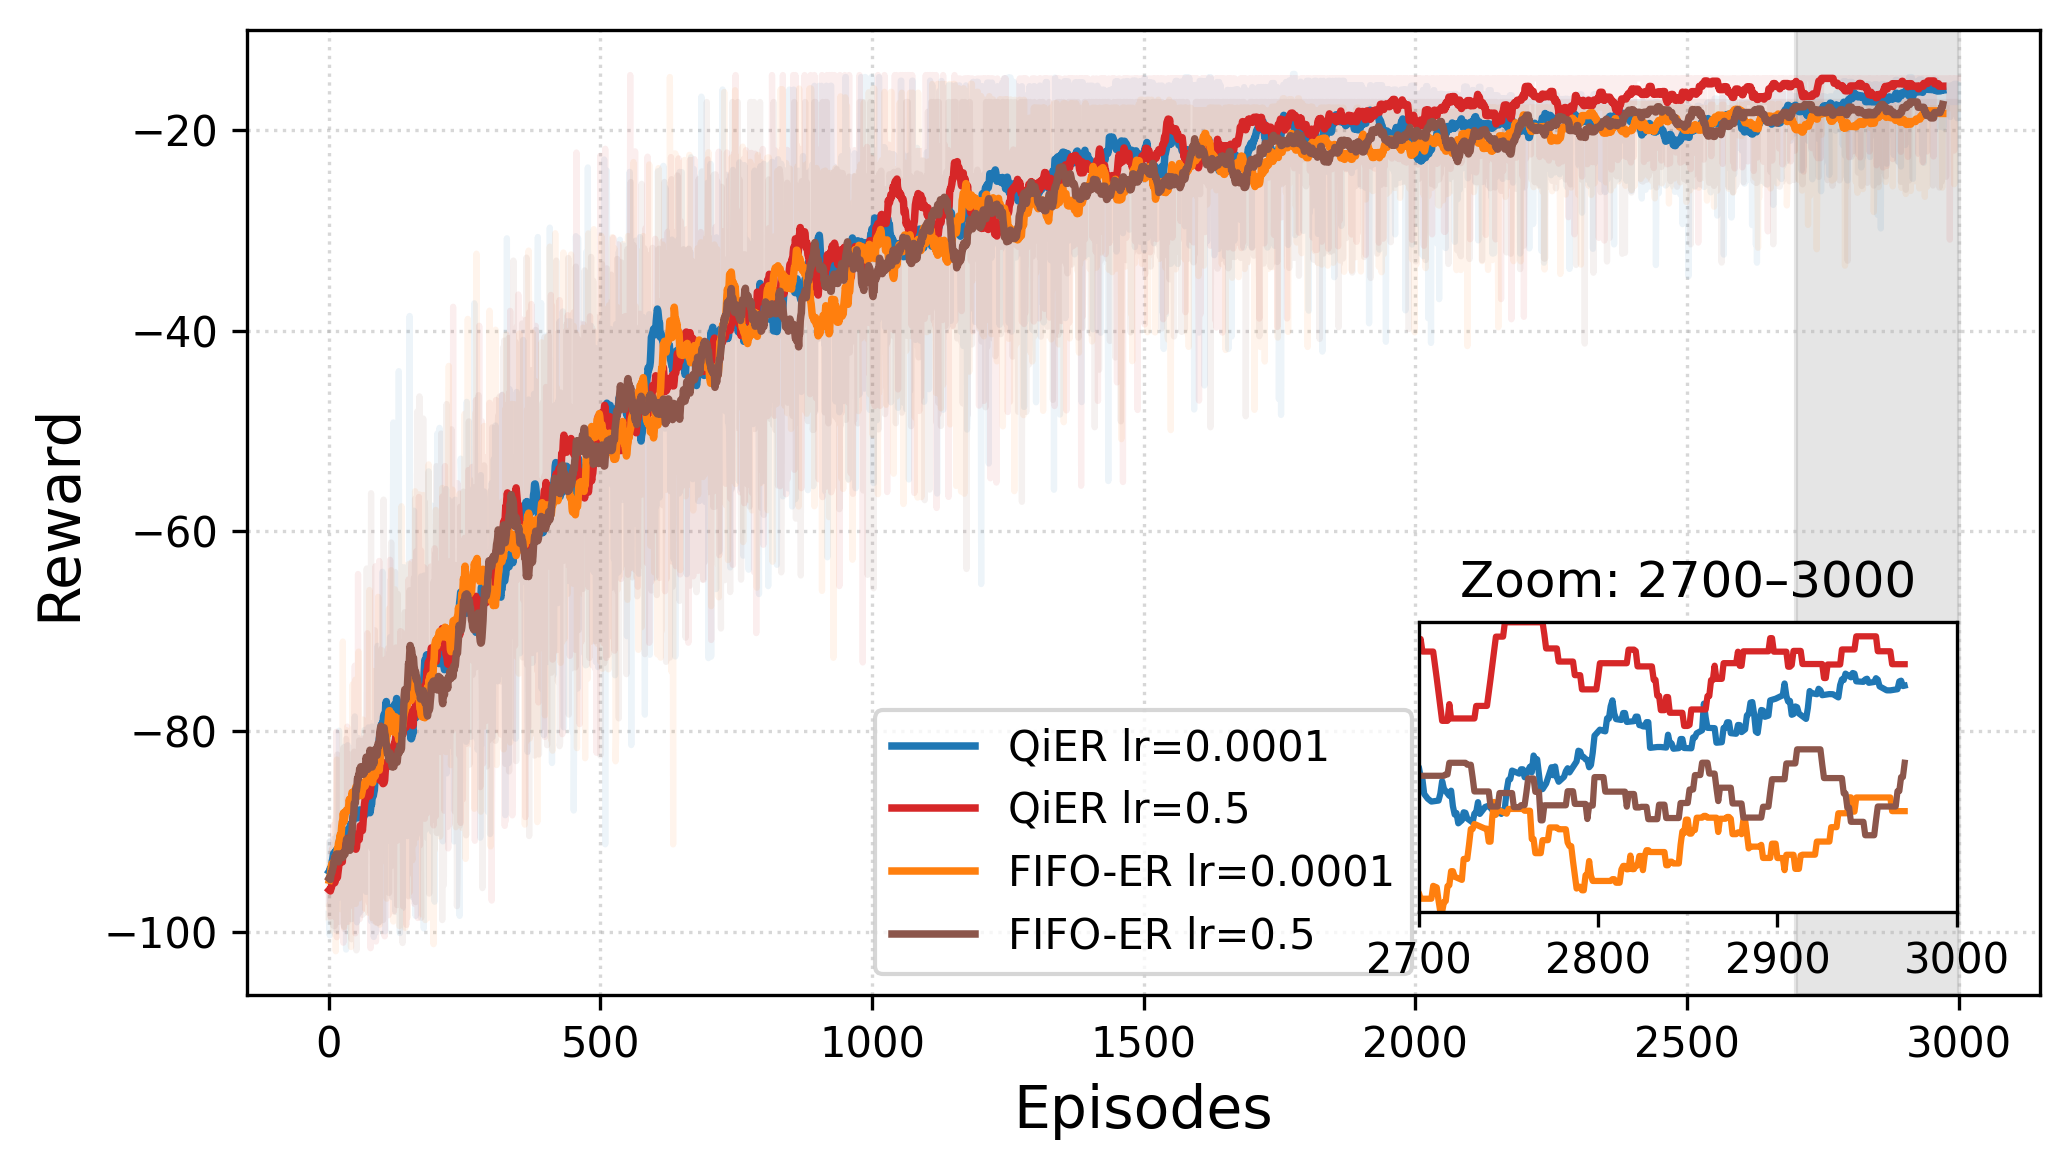

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Moving average
def moving_average(data, window_size=30):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Smoothed data
smoothed_lr_0_001_qier = moving_average(lr_0_001_final_reward_qier)
smoothed_lr_0_0001_qier = moving_average(lr_0_0001_final_reward_qier)
smoothed_lr_0_5_qier = moving_average(lr_0_5_final_reward_qier)
smoothed_lr_0_0001_fifo = moving_average(lr_0_0001_final_reward_fifo)
smoothed_lr_0_05_fifo = moving_average(lr_0_05_final_reward_fifo)
smoothed_lr_0_5_fifo = moving_average(lr_0_5_final_reward_fifo)

# X-axis values
x = np.arange(1, len(smoothed_lr_0_0001_qier) + 1)

# Colors
colors = {
    "qier_0001": "#1f77b4",
    "qier_001": "#2ca02c",
    "qier_05": "#d62728",
    "fifo_0001": "#ff7f0e",
    "fifo_05": "#9467bd",
    "fifo_5": "#8c564b",
}

# Create figure and main axis
fig, ax = plt.subplots(figsize=(7, 4), dpi=300)

# Plot raw data (optional, faint lines)
ax.plot(lr_0_0001_final_reward_qier, alpha=0.08, color=colors["qier_0001"])
ax.plot(lr_0_5_final_reward_qier, alpha=0.08, color=colors["qier_05"])
ax.plot(lr_0_0001_final_reward_fifo, alpha=0.08, color=colors["fifo_0001"])
ax.plot(lr_0_5_final_reward_fifo, alpha=0.08, color=colors["fifo_5"])

# Plot smoothed data
ax.plot(x, smoothed_lr_0_0001_qier, label="QiER lr=0.0001", color=colors["qier_0001"], linewidth=1.8)
ax.plot(x, smoothed_lr_0_5_qier, label="QiER lr=0.5", color=colors["qier_05"], linewidth=1.8)
ax.plot(x, smoothed_lr_0_0001_fifo, label="FIFO-ER lr=0.0001", color=colors["fifo_0001"], linewidth=1.8)
ax.plot(x, smoothed_lr_0_5_fifo, label="FIFO-ER lr=0.5", color=colors["fifo_5"], linewidth=1.8)

# Labels and legend
ax.set_xlabel("Episodes", fontsize = 14)
ax.set_ylabel("Reward", fontsize = 14)
# ax.set_title("Reward vs Episodes with Zoom")
ax.grid(True, linestyle=':', alpha=0.5)
ax.legend()

# Highlight zoomed region
ax.axvspan(2700, 3000, color='gray', alpha=0.2)

# Inset for zoomed region
axins = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=2)

axins.plot(x, smoothed_lr_0_0001_qier, color=colors["qier_0001"])
axins.plot(x, smoothed_lr_0_5_qier, color=colors["qier_05"])
axins.plot(x, smoothed_lr_0_0001_fifo, color=colors["fifo_0001"])
axins.plot(x, smoothed_lr_0_5_fifo, color=colors["fifo_5"])

axins.set_xlim(2700, 3000)
axins.set_ylim(
    min(smoothed_lr_0_5_fifo[2700:3000].min(), smoothed_lr_0_0001_fifo[2700:3000].min(),
        smoothed_lr_0_0001_qier[2700:3000].min(), smoothed_lr_0_5_qier[2700:3000].min()),
    max(smoothed_lr_0_5_fifo[2700:3000].max(), smoothed_lr_0_0001_fifo[2700:3000].max(),
        smoothed_lr_0_0001_qier[2700:3000].max(), smoothed_lr_0_5_qier[2700:3000].max())
)
axins.set_xticks([2700, 2800, 2900, 3000])
axins.set_yticks([])
axins.set_title("Zoom: 2700–3000", fontsize=12)

# Save and show
plt.tight_layout()
plt.savefig("reward_with_inset_zoom.png", dpi=300)
plt.show()
